In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
from operator import add
import os
from collections import OrderedDict
import uproot
import pandas as pd
import sys
import scipy
import awkward
import numpy as np
from numpy import sqrt
import math
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0
wH = 1
Z_MASS = 91.2
# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [3]:
%%time

fpath =OrderedDict()
tree = OrderedDict()
path= '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v122/normalized/'

fpath['ee, m_{s} = 0.1 GeV, c#tau = 100 mm'] = path + 'ggH_HToSS_SToEE_ms0p1_pl100_137000pb_weighted.root'
fpath['ee, m_{s} = 0.1 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToEE_ms0p1_pl500_137000pb_weighted.root'
fpath['ee, m_{s} = 0.4 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToEE_ms0p4_pl500_137000pb_weighted.root'
fpath['k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToKPlusKMinus_ms1p5_pl500_137000pb_weighted.root'
fpath['#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm'] = path + 'ggH_HToSS_SToPi0Pi0_ms1_pl100_137000pb_weighted.root'
fpath['#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm'] = path + 'ggH_HToSS_SToPi0Pi0_ms1_pl500_137000pb_weighted.root'
fpath['#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1_pl500_137000pb_weighted.root'
fpath['Combined ee'] = path + 'ggH_HToSS_SToEE_137000pb_weighted.root'
fpath['Combined #pi^{+}#pi^{-}'] = path + 'ggH_HToSS_SToPi0Pi0_ms1_137000pb_weighted.root'
for k,v in fpath.items():
    root_dir = uproot.open(v) 
    tree[k] = root_dir['MuonSystem']

CPU times: user 4.71 s, sys: 179 ms, total: 4.88 s
Wall time: 4.88 s


a
0.557 Ceff ee, m_{s} = 0.1 GeV, c#tau = 100 mm
a
0.599 Ceff ee, m_{s} = 0.1 GeV, c#tau = 500 mm
a
0.577 Ceff ee, m_{s} = 0.4 GeV, c#tau = 500 mm
a
0.581 Ceff k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm
a
0.55 Ceff #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm
a
0.592 Ceff #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm
a
0.578 Ceff #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
a
0.57 Ceff Combined ee
a
0.563 Ceff Combined #pi^{+}#pi^{-}


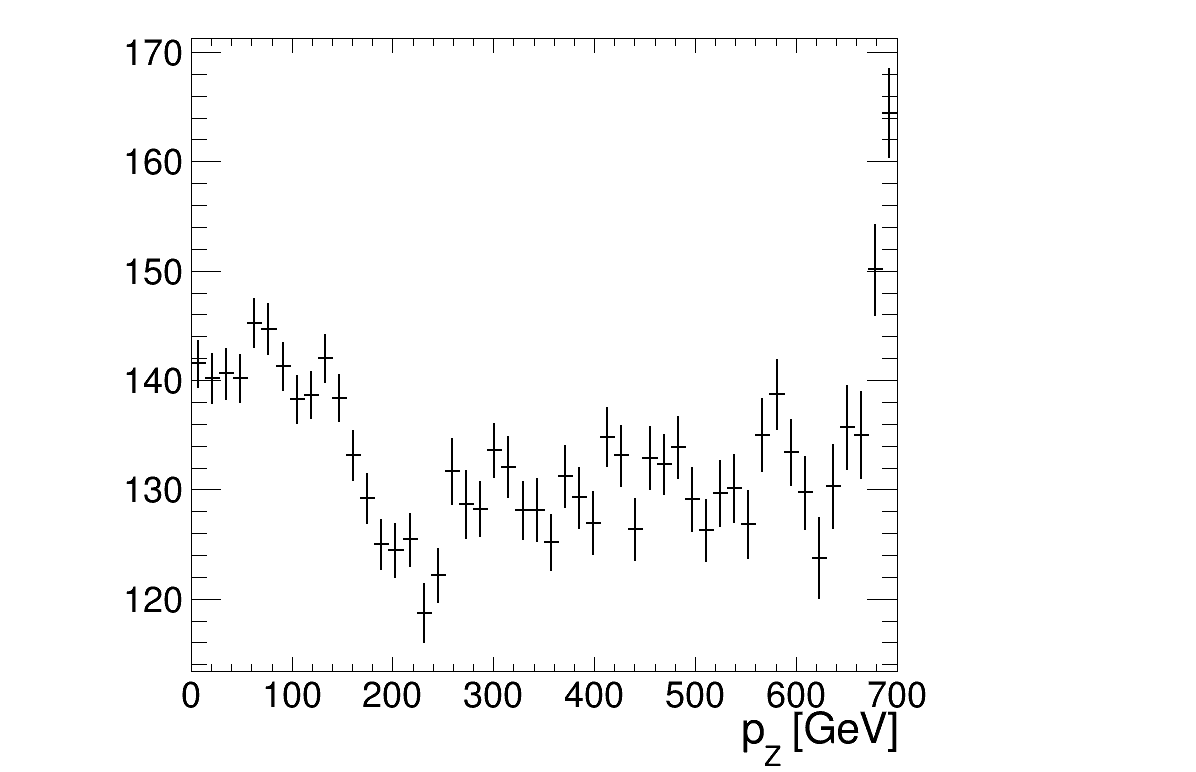

In [4]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
jetPt_cut = 50
cluster_index = '3'
gLLP_decay_vertex_r={}
dtRechitCluster3_match_gLLP_decay_r={}
gLLP_decay_vertex_z={}
dtRechitCluster3_match_gLLP_decay_z={}
weight = {}
pileupWeight = {}
evtNum = {}
runNum = {}
lumiSec = {}
sel_ev = {}
gLLP_beta = {}
gLLP_dt = {}
gLLP_ctau = {}
gLLP_eta={}
dtRechitClusterX = {}
dtRechitClusterY = {}
dtRechitClusterZ = {}
dtRechitClusterPhi = {}
dtRechitClusterEta = {}
dtRechitCluster3NStation = {}
dtRechitClusterNChamber = {}
dtRechitClusterSize = {}
squared_x = {}
squared_y= {}
sum_list={}
dtRechitClusterAvgStation = {}
dtRechitCluster3XSpread={}
xSqr = {}
xSQRLIST = {}
ySqr = {}
ySQRLIST = {}
bothSqrt = {}
bothSqrtLIST = {}
dtRechitCluster3YSpread={}
dtRechitCluster3ZSpread={}
cluster_match_energy33={}
dtRechitCluster3Eta={}
dtRechitCluster3AvgStation5={}
weight_ctau={}
NEWweight_ctau={}
t1NEW={}
t2NEW={}
newLR={}
weight_ctauNew={}
sel_ev2={}
gLLP_eta2={}
cluster_match_eta={}
weight_ctau_1002500={}
#print(type(cscRechitCluster))
gLLP_e={}
cluster_match_energydt={}
dtRechitCluster3_match_gLLP_pt={}
dtRechitCluster3Z={}
dtRechitClusterSize3={}
dtRechitClusterR={}
gLLP_e33={}
newL=[]

for k, T in tree.items():
    print('a')
########### SELECTION: CLUSTERS ############

    sel_rechitcluster = T.array('dtRechitCluster_match_gLLP_dt') ==1  #this pone!!
    sum_sel_rechitcluster = sel_rechitcluster.any()

########### SELECTION: JETS ############
   #
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )
   

########### SELECTION: EVENTS ############
    sel_ev[k] = (np.sum(T.array('gLLP_dt'),axis = 1) > 0)
    sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() == 1)
    t1= T.array('gLLP_ctau')[:,0][sel_ev[k]][np.logical_and((np.logical_not(np.isnan((T.array('gLLP_ctau')[:,0][sel_ev[k]])))),
                           (np.logical_not(np.isnan((T.array('gLLP_ctau')[:,1][sel_ev[k]])))))] #for rw grpah only
    t2= (T.array('gLLP_ctau')[:,1])[sel_ev[k]][np.logical_and((np.logical_not(np.isnan((T.array('gLLP_ctau')[:,0][sel_ev[k]])))),
                                 (np.logical_not(np.isnan((T.array('gLLP_ctau')[:,1][sel_ev[k]])))))] #for rw
   
    tau_old= 100
    tau_new=50
    expIn= (t1+t2)* ((1/tau_old)-(1/tau_new))
    weight1= (tau_old/tau_new)**2
    weight2=np.exp(expIn)
    weight_ctau[k]=weight1*weight2 
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]
    gLLP_dt[k] = T.array('gLLP_dt')[sel_ev[k]] #this one!!
    gLLP_eta[k]= T.array('gLLP_eta')[T.array('gLLP_dt')==1]  
    gLLP_e[k]= T.array('gLLP_e')[T.array('gLLP_dt')==1] 
    gLLP_decay_vertex_r[k]=T.array('gLLP_decay_vertex_r')[T.array('gLLP_dt')==1] 
    gLLP_decay_vertex_z[k]= T.array('gLLP_decay_vertex_z')[T.array('gLLP_dt')==1] 
    weight[k] = T.array('weight')[sel_ev[k]]
    evtNum[k] =  T.array('evtNum')[sel_ev[k]] 
    runNum[k] =  T.array('runNum')[sel_ev[k]]
    lumiSec[k] =  T.array('lumiSec')[sel_ev[k]]
    dtRechitClusterSize[k] =  T.array('dtRechitClusterSize')[sel_rechitcluster][sel_ev[k]].flatten()
    
#     ##### cluster-level variables ###
    dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitCluster3NStation[k] = T.array('dtRechitClusterNStation')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitClusterX[k] = T.array('dtRechitClusterX')[sel_rechitcluster]
    dtRechitCluster3XSpread[k]=T.array('dtRechitClusterXSpread')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitCluster3YSpread[k]=T.array('dtRechitClusterYSpread')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitClusterY[k] = T.array('dtRechitClusterY')[sel_rechitcluster]   
    dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitClusterAvgStation[k] = T.array('dtRechitClusterAvgStation5')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitClusterEta[k]= np.abs(dtRechitClusterEta[k])
    dtRechitClusterAvgStation[k]=np.abs(dtRechitClusterAvgStation[k])
    cluster_match_eta[k]= T.array('dtRechitCluster_match_gLLP_eta')[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitCluster3_match_gLLP_pt[k] = (T.array('dtRechitCluster_match_gLLP_pt'))[sel_rechitcluster][sel_ev[k]].flatten()
    dtRechitClusterSize3[k] =  T.array('dtRechitClusterSize')[sel_rechitcluster]
 
    print(round((np.count_nonzero(np.concatenate(sel_rechitcluster))/ len(np.concatenate(sel_rechitcluster))), 3), 'Ceff',k)
    cluster_match_energydt[k]= ((T.array('dtRechitCluster_match_gLLP_e'))[sel_rechitcluster])
    dtRechitCluster3_match_gLLP_decay_r[k]=((T.array('dtRechitCluster_match_gLLP_decay_r'))[sel_rechitcluster])
    dtRechitCluster3_match_gLLP_decay_z[k]=((T.array('dtRechitCluster_match_gLLP_decay_z'))[sel_rechitcluster])
    dtRechitClusterZ[k] = T.array('dtRechitClusterZ')[sel_rechitcluster]
    dtRechitClusterR[k]=(dtRechitClusterX[k]**2 + dtRechitClusterY[k]**2)**0.5
    dtRechitCluster3ZSpread[k]=T.array('dtRechitClusterZSpread')[sel_rechitcluster][sel_ev[k]].flatten()

    def CutAtWeightUW(lst,num):
        sum=0
        for i in range(0, len(lst)-1):
            if lst[i]>num:
                sum+=1
        return sum

start_t = time.time()
c = rt.TCanvas('c','c', 1200, 800)
h = {}
momentumZ={}
leg = rt.TLegend(0.36,.79,0.5,0.94)  # 1= left/right, 2= height/space out of legend vertical 3 = space of legend horiz
# 4 = vertical height 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)

keys= ('bb, m_{s} = 1 GeV, c#tau = 1000 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm') 
    
momentumZ[k]= (dtRechitCluster3_match_gLLP_pt[k].flatten())*np.sinh(cluster_match_eta[k].flatten())
h[k] = create_TH2D((np.column_stack((momentumZ[k],dtRechitClusterSize[k]))), axis_title=['p_{Z} [GeV]','Rechit Cluster Size', 'Number of Events'], name=k, binning=[50,0,700,50,0,1500])
h[k] = h[k].ProfileX()
h[k].Draw()
c.SetLogz()
c.SetRightMargin(.25)
rt.gPad.Update()
#c.SetLeftMargin(.8)
c.Draw()


KeyError: '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 100 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.4 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 100 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.4 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm (Potential memory leak).
Info in <TCanvas::Print>: ps file c.ps has been created


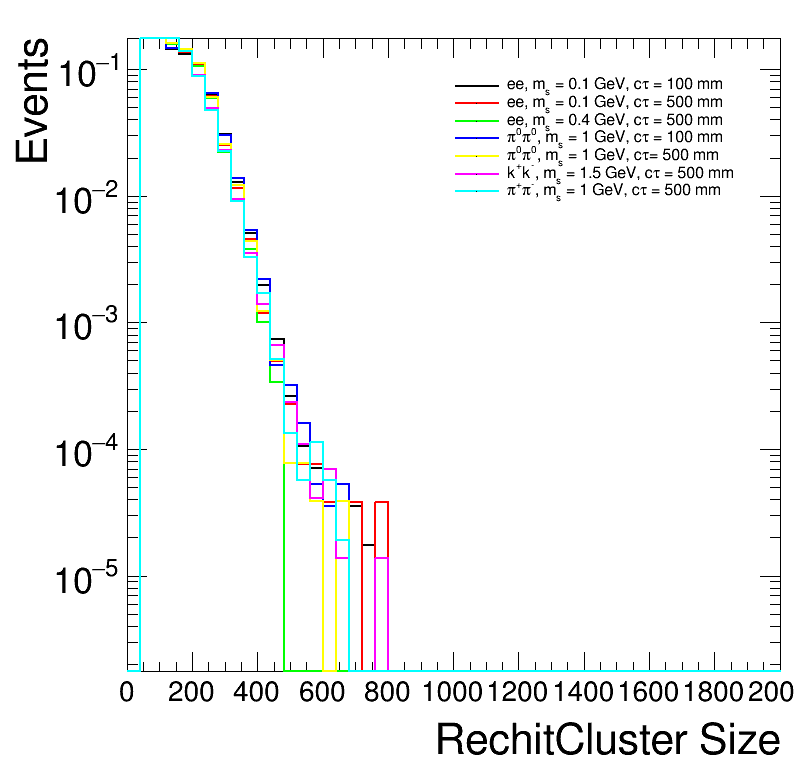

In [7]:
####Cluster Size vs Events ##
c = rt.TCanvas('c','c', 800, 800)
h = {}
leg = rt.TLegend(0.87, 0.74, 0.56, 0.9) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)

UWkeyLst = [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
'#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
colorLst = [2, 0, 3, 1, 7]
count = 1
for a in UWkeyLst:
    h[a] = create_TH1D(dtRechitClusterSize[a], axis_title = ['RechitCluster Size', 'Events'], name = a, binning = [50, 0, 2000])
    h[a].SetLineColor(count)
    h[a].GetYaxis().SetRangeUser(0.1, 10000)
    leg.AddEntry(h[a], a)
    h[a].GetXaxis().SetLabelSize(0.04)
    h[a].DrawNormalized('same hist') 
    count += 1
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs()

NameError: name 'cluster_match_energy' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


1


NameError: name 'cscRechitClusterSize' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 100 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.4 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm (Potential memory leak).
Info in <TCanvas::Print>: ps file c.ps has been created


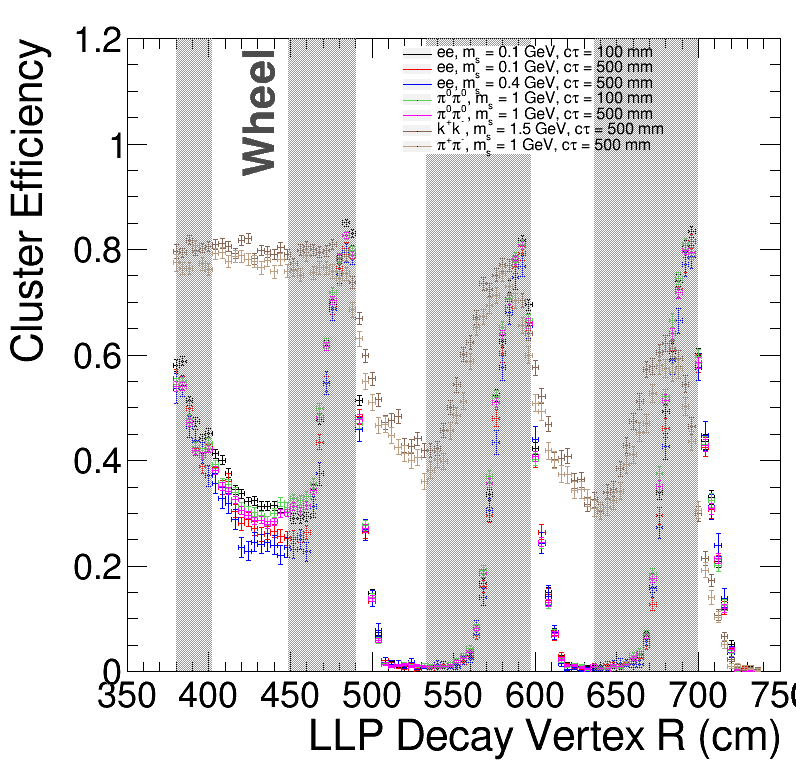

In [10]:

####Decay Vertex R vs Cluster Eff####
start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.5, 0.8, 0.7, 0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
keys =  [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
i = 0
dtRechitCluster3_match_gLLP_decay_r[k]=((T.array('dtRechitCluster_match_gLLP_decay_r'))[sel_rechitcluster])
gLLP_decay_vertex_r[k]=T.array('gLLP_decay_vertex_r')[T.array('gLLP_dt')==1] 
for k in keys: 
    gLLP_decay_vertex_r[k] = np.abs(gLLP_decay_vertex_r[k])
    dtRechitCluster3_match_gLLP_decay_r[k] = np.abs(dtRechitCluster3_match_gLLP_decay_r[k]) 
    h[k] = create_TH1D(gLLP_decay_vertex_r[k].flatten(), axis_title = ['LLP Decay Vertex R (cm)', 'Cluster Efficiency'], name = k, binning = [100, 350, 750])
    j[k] = create_TH1D(dtRechitCluster3_match_gLLP_decay_r[k].flatten(), axis_title = ['LLP Decay Vertex R (cm)', 'Cluster Efficiency'], name = k, binning = [100,  350, 750])
    ymin=0
    ymax=1.2
    pEff1[k] = rt.TEfficiency(j[k], h[k])
    leg.AddEntry(pEff1[k], keys[i])
    pEff1[k].SetLineColor(std_color_list[i])
    pEff1[k].Draw('AP' if i == 0 else 'P same')
    rt.gPad.Update()
    pEff1[k].GetPaintedGraph().GetHistogram().GetXaxis().SetLimits( 350, 750)
    pEff1[k].GetPaintedGraph().SetMaximum(1.2)
    pEff1[k].GetPaintedGraph().SetMinimum(0)
    l = rt.TLine(350,ymin, 350, ymax)
    l.SetLineWidth(2)
    l.SetLineStyle(2)
    l.Draw()
    text = rt.TLatex()
    text.SetTextSize(0.04)
    i += 1
    boxes = []
    boxes.append(rt.TBox(380, ymin, 402, ymax)) 
    boxes.append(rt.TBox(449, ymin,490.5 , ymax)) #between s
    boxes.append(rt.TBox(533.5, ymin,597.5 , ymax)) #
    boxes.append(rt.TBox(636, ymin, 700, ymax)) #b
    for b in boxes:
        b.SetFillColor(15)
        b.SetFillStyle(3001)
        b.Draw('same')
    l = rt.TLatex()
    l.SetTextSize(0.06)
    l.SetTextColor(12)
    l.SetTextAngle(90)
    l.DrawLatex(440, ymax*0.78, 'Wheel') #570, ymax*0.7, 'Wheel')
    l2 = rt.TLatex()
    l2.SetTextSize(0.06)
    l2.SetTextColor(13)
    l2.SetTextAngle(90)
    text = rt.TLatex()
    text.SetTextSize(0.03)
leg.Draw()
c.Draw()
c.SaveAs()



NameError: name 'cluster_match_energy' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


NameError: name 'cluster_match_energy' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [ ]:

c = rt.TCanvas('c','c', 800, 800)
h = {}
leg = rt.TLegend(0.50, 0.94, 0.74, 0.82) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)

UWkeyLst =  [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']


b= 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm'
h['0to100'] =  create_TH1D(CutAtEnergy(cluster_match_energy, 100, 0, b), axis_title = ['RechitCluster Size', 'Events'], 
                name = '0to100', binning = [50, 0, 2000])
h['100to250'] =  create_TH1D(CutAtEnergy(cluster_match_energy, 250, 100, b), axis_title = ['RechitCluster Size', 'Events'], 
                name = '100to250', binning = [50, 0, 2000])
h['250to500'] =  create_TH1D(CutAtEnergy(cluster_match_energy, 500, 250, b), axis_title = ['RechitCluster Size', 'Events'], 
                name = '250to500', binning = [50, 0, 2000])
h['500to1000'] =  create_TH1D(CutAtEnergy(cluster_match_energy, 1000, 500, b), axis_title = ['RechitCluster Size', 'Events'], 
                name = '500to1000', binning = [50, 0, 2000])
h['0to100'].SetLineColor(7)
h['100to250'].SetLineColor(6)
h['250to500'].SetLineColor(5)
h['500to1000'].SetLineColor(4)
h['0to100'].GetYaxis().SetRangeUser(0.1, 10000)
leg.AddEntry(h['0to100'], b + ', 0 to 100'   )
leg.AddEntry(h['100to250'], b+ ', 100 to 250')
leg.AddEntry(h['250to500'], b+ ', 250 to 500' )
leg.AddEntry(h['500to1000'], b+ ', 500 to 1000' )
h['0to100'].GetXaxis().SetLabelSize(0.04)
h['0to100'].DrawNormalized('same hist') 
h['100to250'].DrawNormalized('same hist') 
h['250to500'].DrawNormalized('same hist') 
h['500to1000'].DrawNormalized('same hist') 
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs()



NameError: name 'cluster_match_energy' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


NameError: name 'cluster_match_energy' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


 FCN=244.253 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=2.31581e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.17925e-02   1.29393e-03   8.38168e-06   1.58988e-01
   2  Mean         1.73547e+02   2.03882e+00   1.10982e-02   9.74633e-05
   3  Sigma        8.42825e+01   1.23123e+00   2.45864e-05   3.88276e-02
 FCN=35.3954 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=6.53599e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.44885e-02   2.54374e-03   5.86326e-06   9.92635e-02
   2  Mean         2.11598e+02   1.35921e+01   2.76779e-02   3.37111e-05
   3  Sigma        1.52515e+02   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


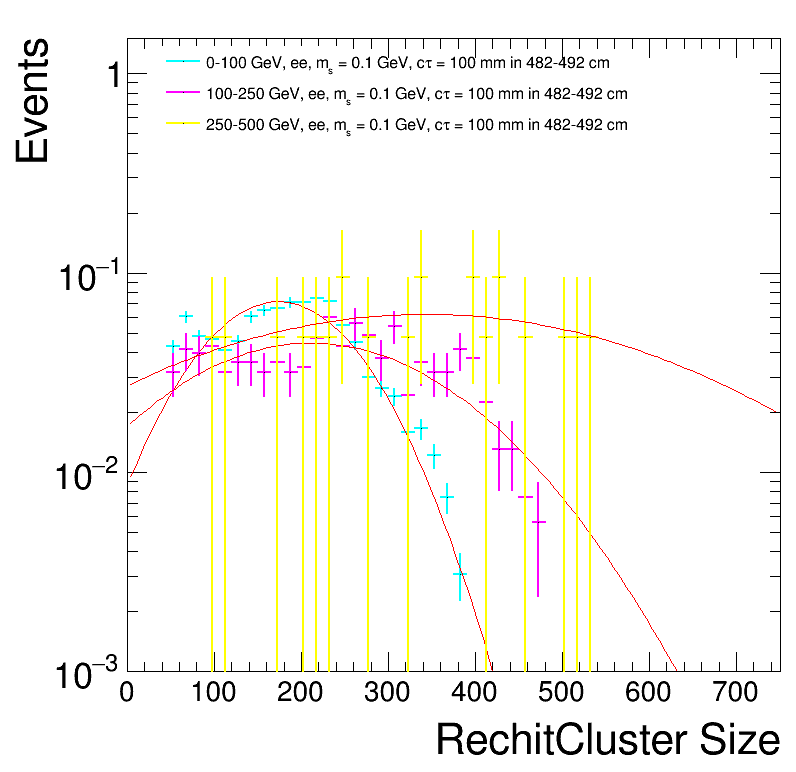

In [14]:
###Fits##
c = rt.TCanvas('c','c', 800, 800)
h = {}
leg = rt.TLegend(0.20, 0.94, 0.44, 0.82) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
key=    'ee, m_{s} = 0.1 GeV, c#tau = 100 mm'
lowerPos= 482
upperPos= 492
UWkeyLst = [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 
            'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']

result1 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <1000) & (cluster_match_energydt[key].flatten()> 500))]

result2 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <500) & (cluster_match_energydt[key].flatten()> 250))]

result3 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <250) & (cluster_match_energydt[key].flatten()> 100))]

result4 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <100) & (cluster_match_energydt[key].flatten()> 0))]
h['0to100'] =  create_TH1D(result4, axis_title = ['RechitCluster Size', 'Events'], 
                name = '0to100', binning = [50, 0, 750])
h['100to250'] =  create_TH1D(result3, axis_title = ['RechitCluster Size', 'Events'], 
                name = '100to250', binning = [50, 0, 750])
h['250to500'] =  create_TH1D(result2, axis_title = ['RechitCluster Size', 'Events'], 
                name = '250to500', binning = [50, 0, 750])
h['500to1000'] =  create_TH1D(result1, axis_title = ['RechitCluster Size', 'Events'], 
                name = '500to1000', binning = [50, 0, 750])
h['0to100'].Scale(1/h['0to100'].Integral())
h['0to100'].Draw('same')
h['0to100'].Fit('gaus')
h['0to100'].GetFunction('gaus').Draw('same')
h['100to250'].Scale(1/h['100to250'].Integral())
h['100to250'].Draw('same')
h['100to250'].Fit('gaus')
h['100to250'].GetFunction('gaus').Draw('same')
h['250to500'].Scale(1/h['250to500'].Integral())
h['250to500'].Draw('same')
h['250to500'].Fit('gaus')
h['250to500'].GetFunction('gaus').Draw('same')
h['0to100'].SetStats(0)
h['100to250'].SetStats(0)
h['250to500'].SetStats(0)
h['0to100'].SetLineColor(7)
h['100to250'].SetLineColor(6)
h['250to500'].SetLineColor(5)
h['0to100'].GetYaxis().SetRangeUser(0.001, 1.5)
lowerPosString=str(lowerPos)
upperPosString=str(upperPos)
leg.AddEntry(h['0to100'], '0-100 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')
leg.AddEntry(h['100to250'], '100-250 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')
leg.AddEntry(h['250to500'], '250-500 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')

h['0to100'].GetXaxis().SetLabelSize(0.04)
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs()


In [15]:
start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.50, 0.84, 0.74, 0.9) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
keys = [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
k=  'ee, m_{s} = 0.1 GeV, c#tau = 100 mm'
cluster_match_energy[k] = np.abs(cluster_match_energy[k])
dtRechitClusterSize3[k] = np.abs(dtRechitClusterSize3[k] )  
h[k] = create_TH2D((np.column_stack((np.concatenate(cluster_match_energy[k], axis=0),np.concatenate(dtRechitClusterSize3[k], axis=0)))), 
                       axis_title=['LLP Energy (GeV)','Cluster Size', 'Number of Events'], name=k, binning=[50,50,800,50,0,700])

h[k] = h[k].ProfileX()
h[k].Draw()

leg.AddEntry(h[k],k)
#h[k].Draw('colz')   
#c.SetLogz()
c.Draw()
leg.Draw()
c.SaveAs()


NameError: name 'cluster_match_energy' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


TH1.Print Name  = ee, m_{s} = 0.1 GeV, c#tau = 100 mm_pfx, Entries= 59499, Total sum= 4289.99
TH1.Print Name  = #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm_pfx, Entries= 58926, Total sum= 4740.03
TH1.Print Name  = #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm_pfx, Entries= 26222, Total sum= 2941.5
TH1.Print Name  = k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm_pfx, Entries= 75995, Total sum= 4663.51
TH1.Print Name  = #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm_pfx, Entries= 54162, Total sum= 5097.55


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


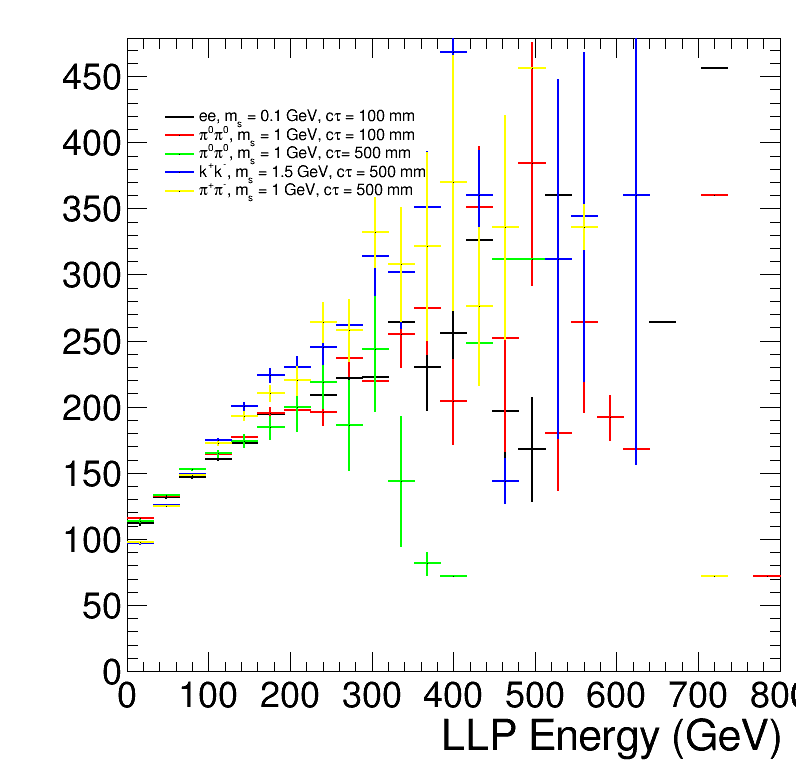

[[] [] [] ... [] [362.3306] []] 998500
[  33.644638   74.42494  -123.58859  ... -362.3306    466.52594
  124.07616 ] 195741


ValueError: all the input array dimensions except for the concatenation axis must match exactly

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [18]:

c = rt.TCanvas('c','c', 800, 800)
h = {}
b={}
j = {}
pEff1 = {}
leg = rt.TLegend(0.2, 0.74, 0.4, 0.87) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
count=1
keys = ['ee, m_{s} = 0.1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm','#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm',
      'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm', '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
k='ee, m_{s} = 0.1 GeV, c#tau = 100 mm'
for k in keys:
    dtRechitClusterR[k] = np.abs(dtRechitClusterR[k])
    dtRechitCluster3_match_gLLP_decay_r[k] = np.abs(dtRechitCluster3_match_gLLP_decay_r[k] ) 
    h[k] = create_TH2D((np.column_stack((np.concatenate(dtRechitCluster3_match_gLLP_decay_r[k], axis=0), np.concatenate(dtRechitClusterR[k], axis=0)))), 
                       axis_title=['  LLP Decay Position R','LLP Cluster Position  ',  'Number of Events'], name=k, binning=[50,400,800,50,400,850])
    h[k].SetLineColor(count)
    h[k].Draw('colz') 
    h[k].Print()
    leg.AddEntry(h[k],k)
    count+=1
c.SetLogz()
c.Draw()
leg.Draw()
c.SaveAs()




KeyboardInterrupt: 

TH1.Print Name  = ee, m_{s} = 0.1 GeV, c#tau = 100 mm, Entries= 59500, Total sum= 50207
TH1.Print Name  = #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm, Entries= 58926, Total sum= 50272


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


AttributeError: 'int' object has no attribute 'all'

AttributeError: 'int' object has no attribute 'sqrt'

[1, 4, 16]


TH1.Print Name  = ee, m_{s} = 0.1 GeV, c#tau = 100 mm, Entries= 59500, Total sum= 50207


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


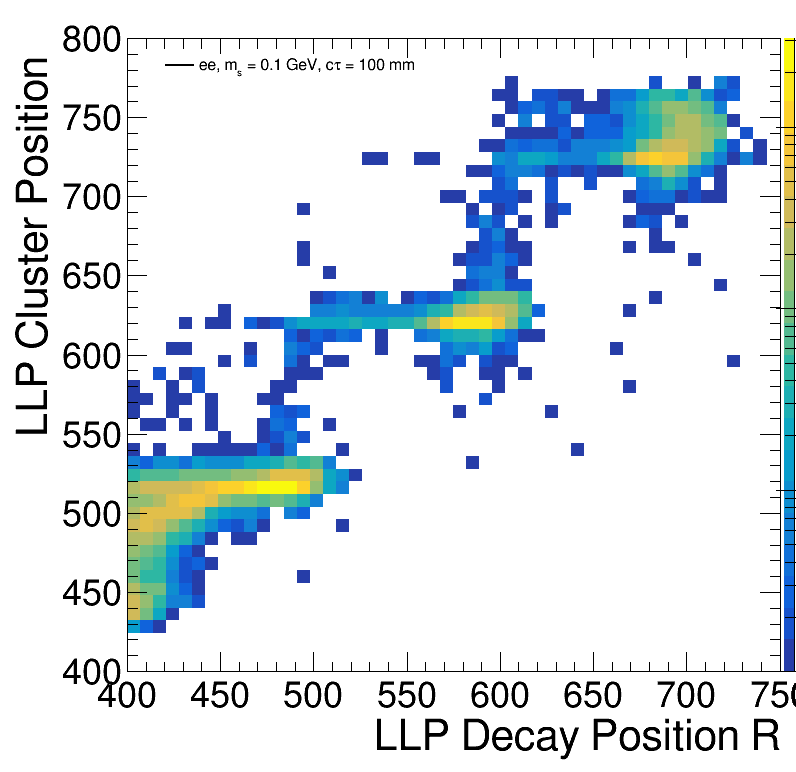

In [19]:
###Decay Position vs Cluster Position ##

#### start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
b={}
j = {}
pEff1 = {}
leg = rt.TLegend(0.2, 0.9, 0.4, 0.93) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
count=1
keys = ['ee, m_{s} = 0.1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm','#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm',
      'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm', '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']

k=  'ee, m_{s} = 0.1 GeV, c#tau = 100 mm'
dtRechitClusterR[k] = np.abs(dtRechitClusterR[k])
dtRechitCluster3_match_gLLP_decay_r[k] = np.abs(dtRechitCluster3_match_gLLP_decay_r[k] ) 
h[k] = create_TH2D((np.column_stack((np.concatenate(dtRechitCluster3_match_gLLP_decay_r[k], axis=0), np.concatenate(dtRechitClusterR[k], axis=0)))), 
                   axis_title=['  LLP Decay Position R','LLP Cluster Position  ',  'Number of Events'], name=k, binning=[50,400,750,50,400,800])
h[k].SetLineColor(count)
h[k].Draw('colz') 
h[k].Print()
leg.AddEntry(h[k],k)
count+=1
c.SetLogz()
c.Draw()
leg.Draw()
c.SaveAs()




In [20]:
### Get Mean and RMS ##

lowerPos= 980
upperPos= 1000

for key in ['ee, m_{s} = 0.1 GeV, c#tau = 100 mm',
            '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm',
          '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm',
            '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm',
            'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm' ,'Combined ee',
            'Combined #pi^{+}#pi^{-}']:
    result1 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <1000) & (cluster_match_energydt[key].flatten()> 500))]

    result2 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <500) & (cluster_match_energydt[key].flatten()> 250))]

    result3 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <250) & (cluster_match_energydt[key].flatten()> 100))]

    result4 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <100) & (cluster_match_energydt[key].flatten()> 0))]
    h['0to100'] =  create_TH1D(result4, axis_title = ['RechitCluster Size', 'Events'], 
                name = '0to100', binning = [50, 0, 2000])
    h['100to250'] =  create_TH1D(result3, axis_title = ['RechitCluster Size', 'Events'], 
                name = '100to250', binning = [50, 0, 2000])
    h['250to500'] =  create_TH1D(result2, axis_title = ['RechitCluster Size', 'Events'], 
                name = '250to500', binning = [50, 0, 2000])
    h['500to1000'] =  create_TH1D(result1, axis_title = ['RechitCluster Size', 'Events'], 
                name = '500to1000', binning = [50, 0, 2000])
    for p in ['0to100', '100to250', '250to500', '500to1000']:
        print(h[p].GetMean(),  p, key)


0.0 0to100 ee, m_{s} = 0.1 GeV, c#tau = 100 mm
0.0 100to250 ee, m_{s} = 0.1 GeV, c#tau = 100 mm
0.0 250to500 ee, m_{s} = 0.1 GeV, c#tau = 100 mm
0.0 500to1000 ee, m_{s} = 0.1 GeV, c#tau = 100 mm
0.0 0to100 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm
0.0 100to250 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm
0.0 250to500 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm
0.0 500to1000 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm
0.0 0to100 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm
0.0 100to250 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm
0.0 250to500 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm
0.0 500to1000 #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm
0.0 0to100 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
0.0 100to250 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
0.0 250to500 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
0.0 500to1000 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
0.0 0to100 k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm
0.0 100to250 k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau =

Warning in <TROOT::Append>: Replacing existing TH1: 0to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 100to250 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 250to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 500to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 100to250 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 250to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 500to1000 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 0to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 100to250 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 250to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 500to1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


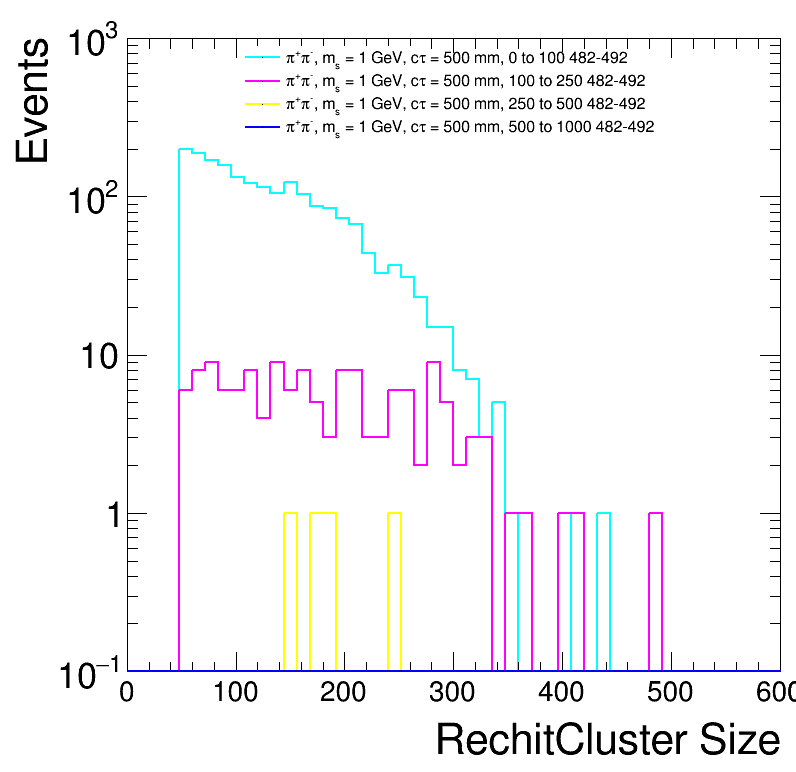

In [21]:
### Cluster Position For Diff Positions ##
#here
c = rt.TCanvas('c','c', 800, 800)
h = {}
leg = rt.TLegend(0.30, 0.94, 0.54, 0.82) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
key=  '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm'
lowerPos= 482
upperPos= 492  
UWkeyLst = [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']

result1 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <1000) & (cluster_match_energydt[key].flatten()> 500))]

result2 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <500) & (cluster_match_energydt[key].flatten()> 250))]

result3 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <250) & (cluster_match_energydt[key].flatten()> 100))]

result4 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <100) & (cluster_match_energydt[key].flatten()> 0))]
h['0to100'] =  create_TH1D(result4, axis_title = ['RechitCluster Size', 'Events'], 
                name = '0to100', binning = [50, 0, 600])
h['100to250'] =  create_TH1D(result3, axis_title = ['RechitCluster Size', 'Events'], 
                name = '100to250', binning = [50, 0, 600])
h['250to500'] =  create_TH1D(result2, axis_title = ['RechitCluster Size', 'Events'], 
                name = '250to500', binning = [50, 0, 600])
h['500to1000'] =  create_TH1D(result1, axis_title = ['RechitCluster Size', 'Events'], 
                name = '500to1000', binning = [50, 0, 600])
h['0to100'].Draw('same') 
h['100to250'].Draw('same') 
h['250to500'].Draw('same') 
h['500to1000'].Draw('same') 

h['0to100'].SetLineColor(7)
h['100to250'].SetLineColor(6)
h['250to500'].SetLineColor(5)
h['500to1000'].SetLineColor(4)
h['0to100'].GetYaxis().SetRangeUser(0.1, 1000)
leg.AddEntry(h['0to100'], key + ', 0 to 100 '+str(lowerPos)+'-' + str(upperPos))
leg.AddEntry(h['100to250'], key+ ', 100 to 250 ' +str(lowerPos)+'-' + str(upperPos))
leg.AddEntry(h['250to500'], key+ ', 250 to 500 '+str(lowerPos)+'-' + str(upperPos))
leg.AddEntry(h['500to1000'], key+ ', 500 to 1000 '+str(lowerPos)+'-' + str(upperPos))
h['0to100'].GetXaxis().SetLabelSize(0.04)
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs()


KeyError: '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


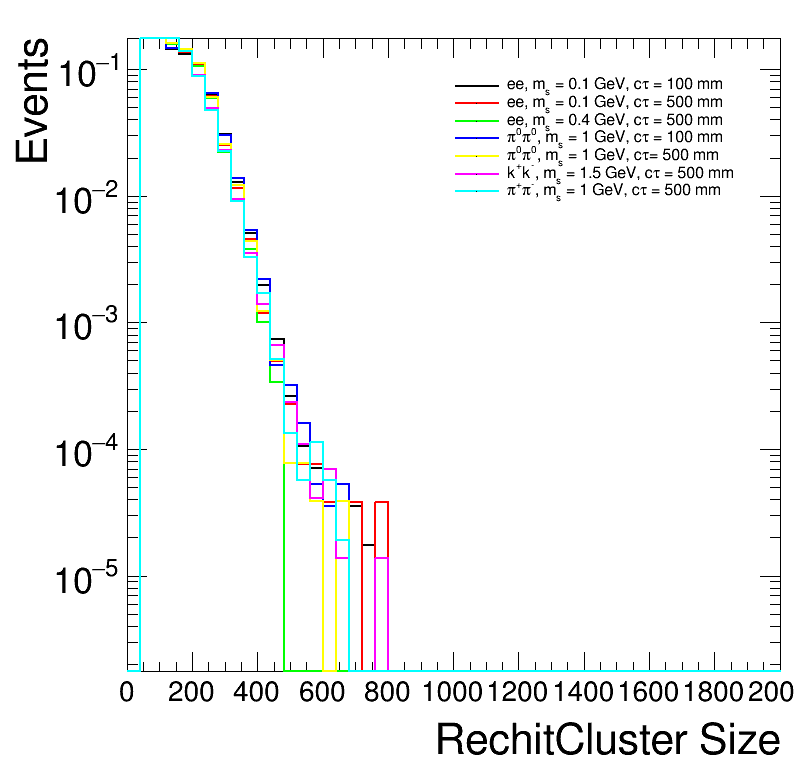

In [25]:
####Cluster Position for ALL ##
c = rt.TCanvas('c','c', 800, 800)
h = {}
leg = rt.TLegend(0.87, 0.74, 0.56, 0.9) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)


UWkeyLst = [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
'#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
colorLst = [2, 0, 3, 1, 7]
count = 1
for a in UWkeyLst:
    h[a] = create_TH1D(dtRechitClusterSize[a], axis_title = ['RechitCluster Size', 'Events'], name = a, binning = [50, 0, 2000])
    h[a].SetLineColor(count)
    h[a].GetYaxis().SetRangeUser(0.1, 10000)
    leg.AddEntry(h[a], a)
    h[a].GetXaxis().SetLabelSize(0.04)
    h[a].DrawNormalized('same hist') 
    count += 1
leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs()




Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 500to1000
Info in <TCanvas::Print>: ps file c.ps has been created


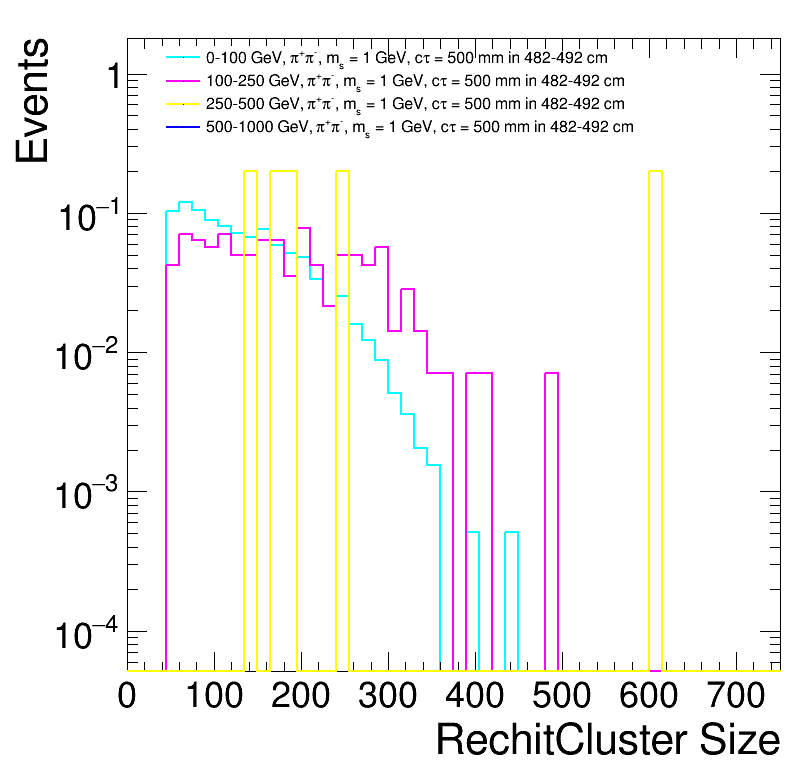

In [26]:
####Cluster Size For Positions##
#here
c = rt.TCanvas('c','c', 800, 800)
h = {}
leg = rt.TLegend(0.20, 0.94, 0.44, 0.82) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
key=        '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm'
lowerPos= 482
upperPos= 492
UWkeyLst = [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']

result1 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <1000) & (cluster_match_energydt[key].flatten()> 500))]

result2 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <500) & (cluster_match_energydt[key].flatten()> 250))]

result3 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <250) & (cluster_match_energydt[key].flatten()> 100))]

result4 = dtRechitClusterSize3[key].flatten()[np.where((dtRechitCluster3_match_gLLP_decay_r[key].flatten()>lowerPos) &
                                          (dtRechitCluster3_match_gLLP_decay_r[key].flatten() < upperPos) & 
                                                       (cluster_match_energydt[key].flatten() <100) & (cluster_match_energydt[key].flatten()> 0))]
h['0to100'] =  create_TH1D(result4, axis_title = ['RechitCluster Size', 'Events'], 
                name = '0to100', binning = [50, 0, 750])
h['100to250'] =  create_TH1D(result3, axis_title = ['RechitCluster Size', 'Events'], 
                name = '100to250', binning = [50, 0, 750])
h['250to500'] =  create_TH1D(result2, axis_title = ['RechitCluster Size', 'Events'], 
                name = '250to500', binning = [50, 0, 750])
h['500to1000'] =  create_TH1D(result1, axis_title = ['RechitCluster Size', 'Events'], 
                name = '500to1000', binning = [50, 0, 750])


h['0to100'].GetYaxis().SetRangeUser(0.1, 3500)

h['0to100'].SetLineColor(7)
h['100to250'].SetLineColor(6)
h['250to500'].SetLineColor(5)
h['500to1000'].SetLineColor(4)
h['0to100'].DrawNormalized('same') 
h['100to250'].DrawNormalized('same') 
h['250to500'].DrawNormalized('same') 
h['500to1000'].DrawNormalized('same') 

lowerPosString= str(lowerPos)
upperPosString=str(upperPos)


leg.AddEntry(h['0to100'], '0-100 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')
leg.AddEntry(h['100to250'], '100-250 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')
leg.AddEntry(h['250to500'], '250-500 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')
leg.AddEntry(h['500to1000'], '500-1000 GeV, '+key +' in '+lowerPosString+'-'+upperPosString+' cm')

h['0to100'].GetXaxis().SetLabelSize(0.04)

leg.Draw()
c.SetLogy()
c.Draw()
c.SaveAs()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


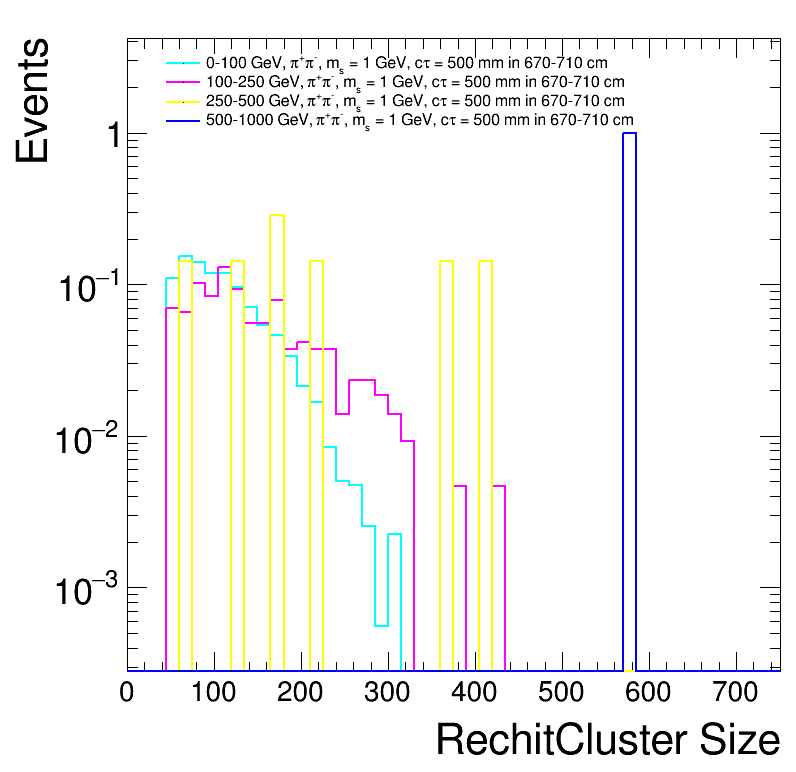

111.09078173157748 +- 0.7926460130179106 0to100 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
145.69767441860466 +- 4.8162770458873245 100to250 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm
216.57142857142858 +- 43.64834295326223 250to500 #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm


Warning in <TROOT::Append>: Replacing existing TH1: 0to100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 100to250 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 250to500 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 500to1000 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 100 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.1 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ee, m_{s} = 0.4 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: #pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm (Potential memory leak).
Info in <TCanvas::Print>: ps file c.ps has been created


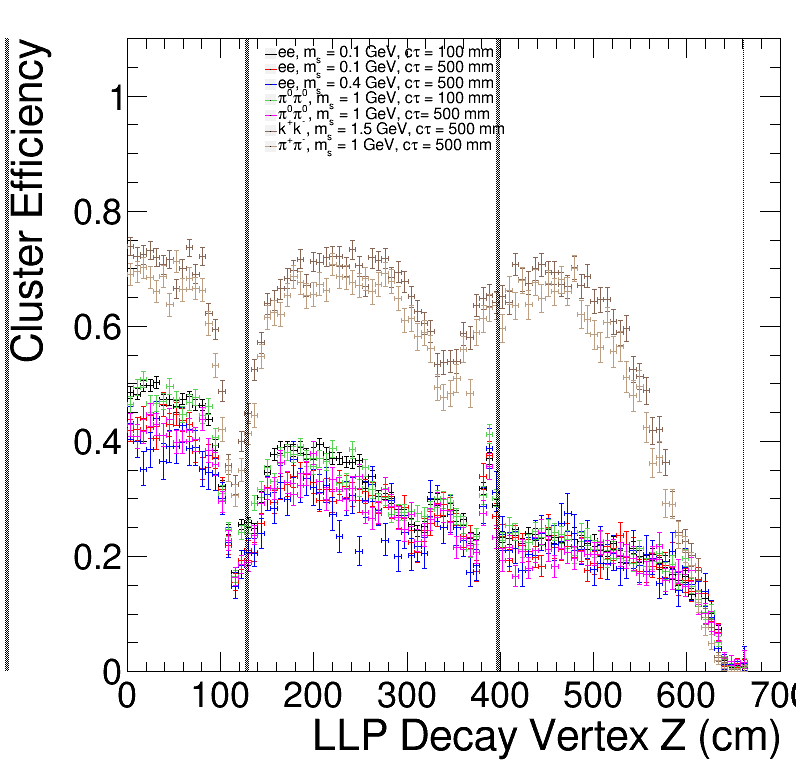

In [27]:

####Decay Vertex Z vs CEff###
start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.33, 0.8, 0.41, 0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
keys =  [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm',  '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm','k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
i = 0
for k in keys:  
    h[k] = create_TH1D(gLLP_decay_vertex_z[k].flatten(), axis_title = ['LLP Decay Vertex Z (cm)', 'Cluster Efficiency'], name = k, binning = [100, 0,700])
    j[k] = create_TH1D(dtRechitCluster3_match_gLLP_decay_z[k].flatten(), axis_title = ['LLP Decay Vertex Z (cm)', 'Cluster Efficiency'], name = k, binning = [100,0, 700])
    pEff1[k] = rt.TEfficiency(j[k], h[k])
    leg.AddEntry(pEff1[k], keys[i])
    pEff1[k].SetLineColor(std_color_list[i])
    pEff1[k].Draw('AP' if i == 0 else 'P same')
    rt.gPad.Update()
    pEff1[k].GetPaintedGraph().GetHistogram().GetXaxis().SetLimits(0, 700)
    pEff1[k].GetPaintedGraph().SetMaximum(1.1)
    pEff1[k].GetPaintedGraph().SetMinimum(0)
    i += 1

    ymax = pEff1[k].GetPaintedGraph().GetHistogram().GetMaximum()
    ymin = pEff1[k].GetPaintedGraph().GetHistogram().GetMinimum()
    xmin = pEff1[k].GetPaintedGraph().GetHistogram().GetXaxis().GetXmin()
    xmax = pEff1[k].GetPaintedGraph().GetHistogram().GetXaxis().GetXmax()
    ymax = pEff1[k].GetPaintedGraph().GetHistogram().GetMaximum()
    ymin = pEff1[k].GetPaintedGraph().GetHistogram().GetMinimum()
    xmin = pEff1[k].GetPaintedGraph().GetHistogram().GetXaxis().GetXmin()
    xmax = pEff1[k].GetPaintedGraph().GetHistogram().GetXaxis().GetXmax()
    boxes = []
    lines=[]
    lines.append(rt.TBox(661, ymin, 662, ymax)) #where first wheel ends
    lines.append(rt.TBox(395.4, ymin, 400, ymax))
    lines.append(rt.TBox(126.8, ymin, 131, ymax)) #where first wheel ends
    lines.append(rt.TBox(395.4, ymin, 400, ymax))
    boxes.append(rt.TBox(-632, ymin, -650, ymax))
    lines.append(rt.TBox(-661, ymin, -662, ymax)) #where first wheel ends
    lines.append(rt.TBox(-395.4, ymin, -400, ymax))
    lines.append(rt.TBox(-126.8, ymin, -131, ymax)) #where first wheel ends
    lines.append(rt.TBox(-395.4, ymin, -400, ymax))
    
    for p in lines:
        p.SetFillColor(1)
        p.SetFillStyle(3001)
        p.Draw('same')

    for b in boxes:
        b.SetFillColor(15)
        b.SetFillStyle(3001)
        b.Draw('same')
    l = rt.TLatex()
    l.SetTextSize(0.08)
    l.SetTextColor(12)
    l.SetTextAngle(90)
    l2 = rt.TLatex()
    l2.SetTextSize(0.06)
    l2.SetTextColor(13)
    l2.SetTextAngle(90)
    l2.DrawLatex(1110, ymax*0.5, 'Beyond CMS')
    text = rt.TLatex()
    text.SetTextSize(0.04) 
leg.Draw()
c.Draw()
c.SaveAs()
    
    



In [ ]:
#### start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.18, 0.73, 0.3, 0.9) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
count=1
keys =  [ 'ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.1 GeV, c#tau = 500 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 
 '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm',  '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm','k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm',
'#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
# for k, T in tree.items():
# cluster_match_energy[k] = np.abs(cluster_match_energy[k])
# cscRechitClusterSize3[k] = np.abs(cscRechitClusterSize3[k] )  
# h[k] = create_TH2D((np.column_stack((np.concatenate(cluster_match_energydt[k], axis=0),np.concatenate(cscRechitClusterSize3[k], axis=0)))), 
#                        axis_title=['LLP Energy (GeV)','Cluster Size', 'Number of Events'], name=k, binning=[50,0,700,50,0,1200])

for k in keys:

    cluster_match_energydt[k] = np.abs(cluster_match_energydt[k])
    dtRechitClusterSize3[k] = np.abs(dtRechitClusterSize3[k] )  
    h[k] = create_TH2D((np.column_stack((np.concatenate(cluster_match_energydt[k], axis=0),np.concatenate(dtRechitClusterSize3[k], axis=0)))), 
                       axis_title=['LLP Energy (GeV)','Cluster Size', 'Number of Events'], name=k, binning=[ 50,0,700,50,0,1200])
    h[k] = h[k].ProfileX()
    leg.AddEntry(h[k],k)
   
  #  h[k].Draw('colz')   
   

  # 
    h[k].SetLineColor(count)
     
    h[k].Draw('same')
   # h[k].Print()
# b[q].Draw()
# b[q].Print()
  #  leg.AddEntry(h[k],k)
    count+=1


c.Draw()
c.SetLogz()
leg.Draw()
c.SaveAs()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ee, m_{s} = 0.1 GeV, c#tau = 100 mm.png has been created


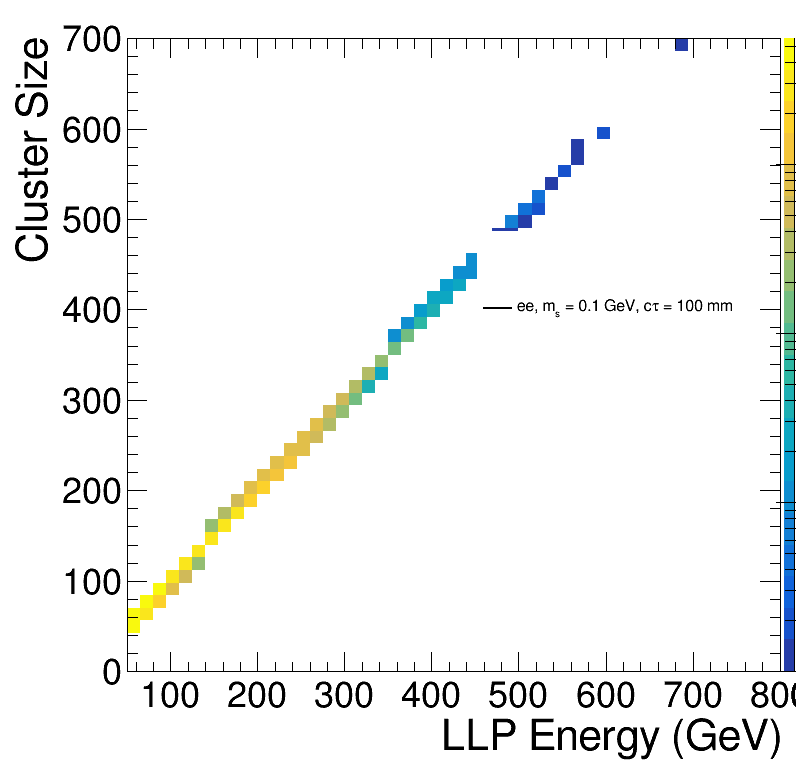

In [40]:
start_t = time.time()

h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.60, 0.5, 0.8, 0.70) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
count=0
UWkeyLst = ['ee, m_{s} = 0.1 GeV, c#tau = 100 mm','ee, m_{s} = 0.4 GeV, c#tau = 500 mm',
            'ee, m_{s} = 4 GeV, c#tau = 500 mm', '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau = 100 mm',
          '#pi^{0}#pi^{0}, m_{s} = 1 GeV, c#tau= 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm', 
            '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
LstofNames = ['ee, m_{s} = 0.1 GeV, c#tau = 100 mm.png','ee, m_{s} = 0.4 GeV, c#tau = 500 mm.png','ee, m_{s} = 4 GeV, c#tau = 500 mm.png', '#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau = 100 mm.png',
          '#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau= 500 mm.png', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm.png', '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm.png']
#or k in UWkeyLst:
k=                          'ee, m_{s} = 0.1 GeV, c#tau = 100 mm'
#leg.Clear()
c = rt.TCanvas('c','c', 800, 800)
cluster_match_energydt[k] = np.abs(cluster_match_energydt[k])
dtRechitClusterSize3[k] = np.abs(dtRechitClusterSize3[k] )  
# h[k] = create_TH2D((np.column_stack((np.concatenate(cscRechitClusterSize3[k], axis=0),np.concatenate(cluster_match_energy[k], axis=0)))), 
#                        axis_title=['Cluster Size','LLP Energy (GeV)', 'Number of Events'], name=k, binning=[50,50,1500,50,0,1000])
h[k] = create_TH2D((np.column_stack((np.concatenate(dtRechitClusterSize3[k], axis=0),np.concatenate(dtRechitClusterSize3[k], axis=0)))), 
                   axis_title=['LLP Energy (GeV)','Cluster Size', 'Number of Events'], name=k, binning=[50,50,800,50,0,700])
leg.AddEntry(h[k],k)
h[k].Draw('colz')   
c.SetLogz()
c.Draw()
leg.Draw()
c.SaveAs(LstofNames[count])
count+=1

#profile x 
#switch x and y